In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter, ExponentialFitter
from lifelines.utils import k_fold_cross_validation
import seaborn as sns
import warnings
import lifelines

In [4]:
data = pd.read_csv('telco.csv')
data.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


In [5]:
data_copy = data.copy()
data_copy.drop(['ID'], axis=1, inplace=True)
cols = ['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat', 'churn']
data_copy = pd.get_dummies(data_copy, columns=cols, drop_first=True)
data_copy.head()

,tenure,age,address,income,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service,churn_Yes
0,13,44,9,64,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True
1,11,33,7,136,False,True,False,False,False,True,False,False,True,True,False,True,False,False,True,True
2,68,52,24,116,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False
3,33,33,12,33,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True
4,23,30,9,30,True,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False


In [26]:
exponential_model = ExponentialFitter()
log_logistic_model = LogLogisticAFTFitter()
log_norm_model = LogNormalAFTFitter()
weibull_model = WeibullAFTFitter()

In [42]:
exponential = exponential_model.fit(data_copy['tenure'], event_observed=data_copy['churn_Yes'])
average_survival_function = np.exp(-exponential.lambda_ * data_copy['tenure'])
expon_survival_avg = average_survival_function.mean()
exponential.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1606.98
               hypothesis = lambda_ != 0

---
          coef  se(coef)  coef lower 95%  coef upper 95%
lambda_ 129.66      7.83          114.30          145.01

         cmp to     z      p  -log2(p)
lambda_    0.00 16.55 <0.005    202.03
---
AIC = 3215.96

In [28]:
log_logistic = log_logistic_model.fit(data_copy, duration_col='tenure', event_col='churn_Yes')
log_logistic_prediction = log_logistic.predict_survival_function(data_copy).T
log_logistic_prediction_avg = log_logistic_prediction.mean()
log_logistic.print_summary()

<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1458.10
         time fit was run = 2024-05-01 21:05:30 UTC

---
                                        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                                        
alpha_ address                          0.04      1.04      0.01            0.02            0.06                1.02                1.06
       age                              0.03      1.03      0.01            0.02            0.05                1.02                1.05
       custcat_E-service                1.04      2.83      0.17            0.72            1.36                2.05                3.91
       custcat_Plus service             0.86      2.37      0.21            0.45            1.27                1.57                3.57
       custcat_Total service            1.20      3.33      0.24            0.73            1.67                2.08                5.34
       ed_Did not complete high school  0.43      1.54      0.20            0.04            0.82                1.05                2.28
       ed_High school degree            0.34      1.40      0.15            0.03            0.64                1.03                1.89
       ed_Post-undergraduate degree    -0.02      0.98      0.22           -0.45            0.40                0.64                1.49
       ed_Some college                  0.24      1.27      0.16           -0.06            0.55                0.94                1.73
       forward_Yes                     -0.19      0.82      0.17           -0.53            0.14                0.59                1.15
       gender_Male                      0.04      1.04      0.11           -0.18            0.26                0.84                1.29
       income                           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
       internet_Yes                    -0.80      0.45      0.14           -1.07           -0.52                0.34                0.60
       marital_Unmarried               -0.45      0.64      0.11           -0.66           -0.23                0.52                0.80
       region_Zone 2                   -0.05      0.95      0.14           -0.31            0.22                0.73                1.24
       region_Zone 3                    0.11      1.12      0.14           -0.15            0.38                0.86                1.46
       retire_Yes                       0.06      1.06      0.48           -0.87            1.00                0.42                2.71
       voice_Yes                       -0.40      0.67      0.16           -0.72           -0.08                0.49                0.92
       Intercept                        2.33     10.33      0.28            1.78            2.89                5.95               17.93
beta_  Intercept                        0.34      1.40      0.05            0.24            0.44                1.27                1.55

                                        cmp to     z      p  -log2(p)
param  covariate                                                     
alpha_ address                            0.00  4.42 <0.005     16.60
       age                                0.00  4.67 <0.005     18.36
       custcat_E-service                  0.00  6.30 <0.005     31.62
       custcat_Plus service               0.00  4.13 <0.005     14.74
       custcat_Total service              0.00  5.00 <0.005     20.73
       ed_Did not complete high school    0.00  2.18   0.03      5.11
       ed_High school degree              0.00  2.17   0.03      5.04
       ed_Post-u

In [29]:
log_norm = log_norm_model.fit(data_copy, duration_col='tenure', event_col='churn_Yes')
log_norm_prediction = log_norm.predict_survival_function(data_copy).T
log_norm_prediction_avg = log_norm_prediction.mean()
log_norm.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2024-05-01 21:05:31 UTC

---
                                        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                                        
mu_    address                          0.04      1.04      0.01            0.03            0.06                1.03                1.06
       age                              0.03      1.03      0.01            0.02            0.05                1.02                1.05
       custcat_E-service                1.07      2.90      0.17            0.73            1.40                2.08                4.06
       custcat_Plus service             0.92      2.52      0.22            0.50            1.35                1.65                3.85
       custcat_Total service            1.20      3.32      0.25            0.71            1.69                2.03                5.42
       ed_Did not complete high school  0.37      1.45      0.20           -0.02            0.77                0.98                2.16
       ed_High school degree            0.32      1.37      0.16           -0.00            0.64                1.00                1.89
       ed_Post-undergraduate degree    -0.03      0.97      0.22           -0.47            0.40                0.62                1.50
       ed_Some college                  0.27      1.31      0.17           -0.05            0.60                0.95                1.82
       forward_Yes                     -0.20      0.82      0.18           -0.55            0.15                0.58                1.17
       gender_Male                      0.05      1.05      0.11           -0.17            0.28                0.84                1.32
       income                           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
       internet_Yes                    -0.77      0.46      0.14           -1.05           -0.49                0.35                0.61
       marital_Unmarried               -0.46      0.63      0.12           -0.68           -0.23                0.51                0.80
       region_Zone 2                   -0.10      0.91      0.14           -0.38            0.18                0.69                1.20
       region_Zone 3                    0.05      1.05      0.14           -0.23            0.33                0.80                1.38
       retire_Yes                       0.02      1.02      0.44           -0.85            0.89                0.43                2.44
       voice_Yes                       -0.43      0.65      0.17           -0.76           -0.10                0.47                0.90
       Intercept                        2.36     10.61      0.29            1.79            2.94                5.98               18.84
sigma_ Intercept                        0.28      1.32      0.05            0.19            0.37                1.20                1.44

                                        cmp to     z      p  -log2(p)
param  covariate                                                     
mu_    address                            0.00  4.78 <0.005     19.11
       age                                0.00  4.50 <0.005     17.19
       custcat_E-service                  0.00  6.25 <0.005     31.21
       custcat_Plus service               0.00  4.29 <0.005     15.75
       custcat_Total service              0.00  4.79 <0.005     19.16
       ed_Did not complete high school    0.00  1.85   0.06      3.97
       ed_High school degree              0.00  1.94   0.05      4.24
       ed_Post-und

In [30]:
weibull = weibull_model.fit(data_copy, duration_col='tenure', event_col='churn_Yes')
weibull_prediction = weibull.predict_survival_function(data_copy).T
weibull_prediction_avg = weibull_prediction.mean()
weibull.print_summary()

<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.17
         time fit was run = 2024-05-01 21:05:32 UTC

---
                                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                                        
lambda_ address                          0.04      1.04      0.01            0.02            0.06                1.02                1.06
        age                              0.03      1.03      0.01            0.01            0.04                1.01                1.04
        custcat_E-service                0.98      2.66      0.16            0.67            1.28                1.96                3.61
        custcat_Plus service             0.74      2.10      0.19            0.36            1.12                1.44                3.06
        custcat_Total service            1.00      2.71      0.21            0.58            1.41                1.78                4.11
        ed_Did not complete high school  0.44      1.55      0.19            0.06            0.82                1.06                2.27
        ed_High school degree            0.32      1.38      0.15            0.03            0.61                1.03                1.83
        ed_Post-undergraduate degree     0.22      1.25      0.19           -0.15            0.60                0.86                1.82
        ed_Some college                  0.25      1.29      0.14           -0.03            0.54                0.97                1.71
        forward_Yes                     -0.10      0.91      0.15           -0.39            0.19                0.68                1.21
        gender_Male                      0.00      1.00      0.10           -0.20            0.21                0.82                1.23
        income                           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        internet_Yes                    -0.77      0.46      0.14           -1.04           -0.50                0.35                0.61
        marital_Unmarried               -0.35      0.71      0.10           -0.55           -0.14                0.58                0.87
        region_Zone 2                   -0.06      0.94      0.13           -0.31            0.19                0.73                1.21
        region_Zone 3                    0.12      1.12      0.13           -0.13            0.36                0.87                1.44
        retire_Yes                       0.17      1.19      0.52           -0.85            1.19                0.43                3.30
        voice_Yes                       -0.34      0.72      0.15           -0.63           -0.04                0.53                0.96
        Intercept                        2.78     16.14      0.27            2.25            3.31                9.48               27.47
rho_    Intercept                        0.17      1.19      0.05            0.07            0.27                1.08                1.32

                                         cmp to     z      p  -log2(p)
param   covariate                                                     
lambda_ address                            0.00  4.69 <0.005     18.47
        age                                0.00  4.12 <0.005     14.69
        custcat_E-service                  0.00  6.28 <0.005     31.44
        custcat_Plus service               0.00  3.83 <0.005     12.95
        custcat_Total service              0.00  4.67 <0.005     18.35
        ed_Did not complete high school    0.00  2.25   0.02      5.37
        ed_High school degree              0.00  2.19   0.03

In [36]:
print(f'Exponential AIC: {exponential.AIC_}')
print(f'Log-Logistic AIC: {log_logistic.AIC_}')
print(f'Log-Normal AIC: {log_norm.AIC_}')
print(f'Weibull AIC: {weibull.AIC_}')
min_model = min(exponential.AIC_, log_logistic.AIC_, log_norm.AIC_, weibull.AIC_)
print(f"The best model is with lowest AIC of: {min_model}")

Exponential AIC: 3215.9608134637247
Log-Logistic AIC: 2956.2085614433336
Log-Normal AIC: 2954.0240102517128
Weibull AIC: 2964.343248083881
The best model is with lowest AIC of: 2954.0240102517128


Based on their AIC value, the Log-Logistic and Log-Normal models outperform the Exponential and Weibull models. Because the churn data contains complex patterns, distributions that are very flexible are needed to capture different survival curve forms, like the log-normal or log-logistic ones. These two are also more suitable for this dataset since they indicate various consumer behaviors toward churning over time. They can also describe the position and scale characteristics of a survival distribution, which provides a better insight into the process itself. In regard to this, choosing the log-normal or log-logistic model will be expected to produce trustworthy estimates of churn likelihoods. So the lowest AIC value has the Log-Normal.

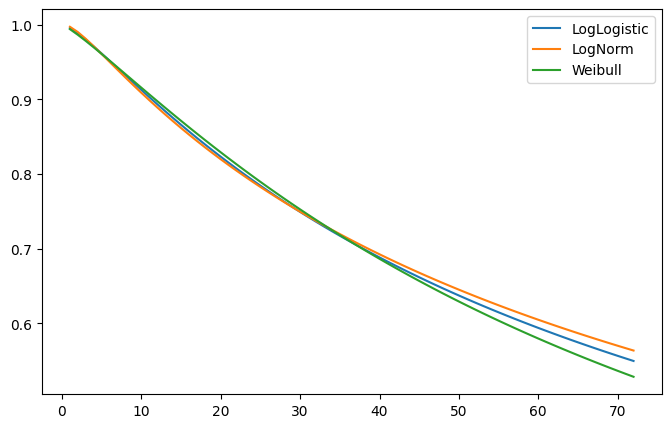

In [49]:
plt.figure(figsize=(8,5))
plt.plot(log_logistic_prediction_avg, label='LogLogistic')
plt.plot(log_norm_prediction_avg, label='LogNorm')
plt.plot(weibull_prediction_avg, label='Weibull')
plt.legend()
plt.show()

In [53]:
columns = ['address', 'age', 'custcat_E-service', 'custcat_Plus service', 'custcat_Total service', 'internet_Yes', 'marital_Unmarried', 'voice_Yes', 'churn_Yes', 'tenure']
final_model = log_norm_model.fit(data_copy[columns], duration_col='tenure', event_col='churn_Yes')
final_model_prediction = final_model.predict_survival_function(data_copy).T
final_model_prediction_avg = final_model_prediction.mean()
final_model.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2024-05-01 21:41:22 UTC

---
                              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                              
mu_    address                0.04      1.04      0.01            0.03            0.06                1.03                1.06
       age                    0.04      1.04      0.01            0.02            0.05                1.02                1.05
       custcat_E-service      1.03      2.79      0.17            0.69            1.36                2.00                3.89
       custcat_Plus service   0.82      2.28      0.17            0.49            1.15                1.63                3.17
       custcat_Total service  1.01      2.75      0.21            0.60            1.42                1.83                4.15
       internet_Yes          -0.84      0.43      0.14           -1.11           -0.57                0.33                0.57
       marital_Unmarried     -0.45      0.64      0.11           -0.67           -0.22                0.51                0.80
       voice_Yes             -0.46      0.63      0.17           -0.79           -0.14                0.45                0.87
       Intercept              2.53     12.62      0.24            2.06            3.01                7.84               20.30
sigma_ Intercept              0.28      1.33      0.05            0.19            0.37                1.21                1.45

                              cmp to     z      p  -log2(p)
param  covariate                                           
mu_    address                  0.00  4.84 <0.005     19.56
       age                      0.00  5.75 <0.005     26.78
       custcat_E-service        0.00  6.07 <0.005     29.53
       custcat_Plus service     0.00  4.85 <0.005     19.66
       custcat_Total service    0.00  4.83 <0.005     19.52
       internet_Yes             0.00 -6.08 <0.005     29.63
       marital_Unmarried        0.00 -3.91 <0.005     13.39
       voice_Yes                0.00 -2.78   0.01      7.52
       Intercept                0.00 10.45 <0.005     82.47
sigma_ Intercept                0.00  6.15 <0.005     30.27
---
Concordance = 0.79
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

In [55]:
clv_data = log_norm_prediction.copy()
sequence = range(1, len(clv_data.columns) + 1)
r = 0.1
for i in sequence:
    clv_data.loc[:, i] = clv_data.loc[:, i] / ((1 + r / 12) ** (sequence[i - 1] - 1))

In [58]:
clv_data["CLV"] = 1300 * clv_data.sum(axis = 1)
data["CLV"] = clv_data.CLV
data

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn,CLV
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes,6.365433e+07
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes,7.389199e+07
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No,9.092324e+07
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes,5.779644e+07
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No,7.804119e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Zone 3,10,39,Unmarried,0,27,Some college,No,Female,No,No,No,Basic service,No,5.276001e+07
996,997,Zone 1,7,34,Unmarried,2,22,Post-undergraduate degree,No,Female,No,No,No,Basic service,No,4.262067e+07
997,998,Zone 3,67,59,Unmarried,40,944,Post-undergraduate degree,No,Female,Yes,Yes,Yes,Total service,No,9.106446e+07
998,999,Zone 3,70,49,Unmarried,18,87,High school degree,No,Female,Yes,No,Yes,Plus service,No,8.114483e+07


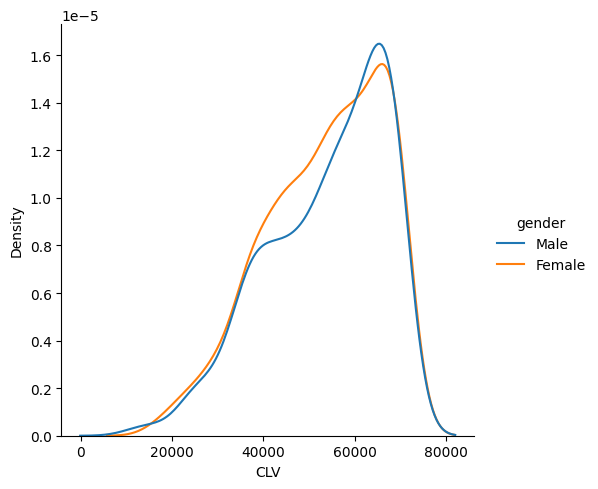

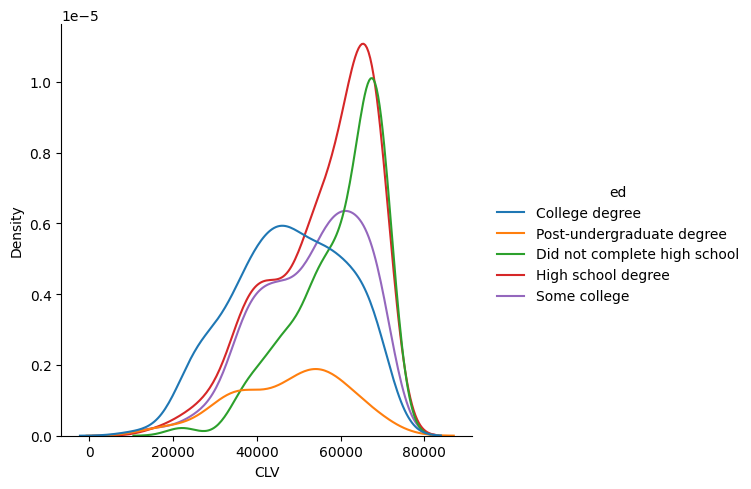

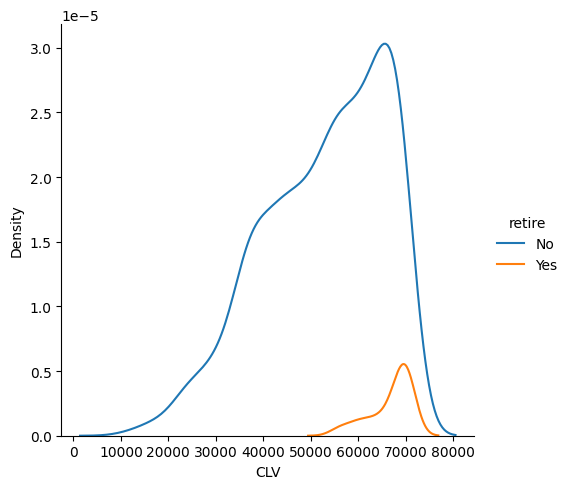

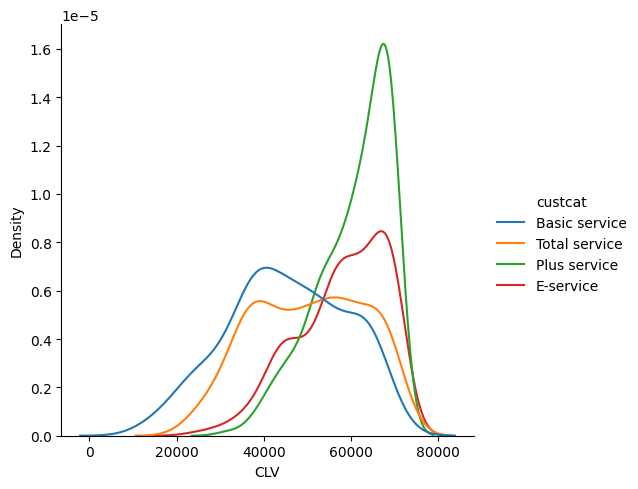

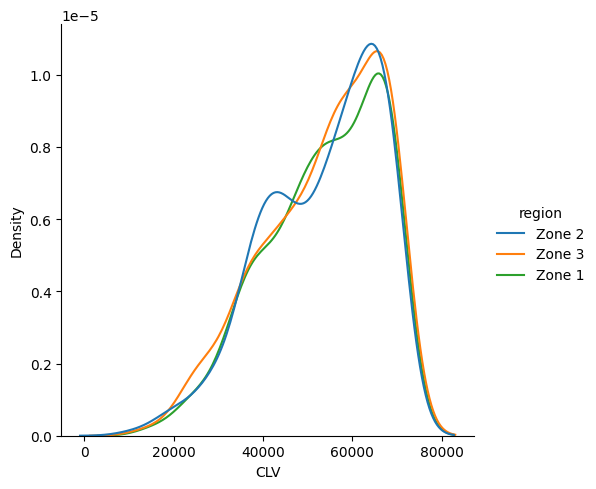

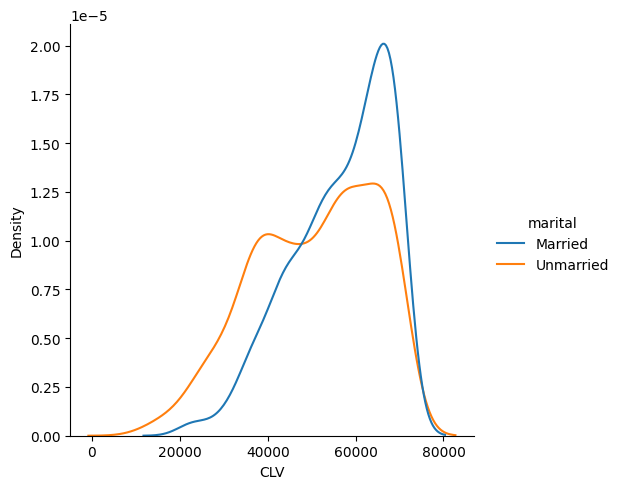

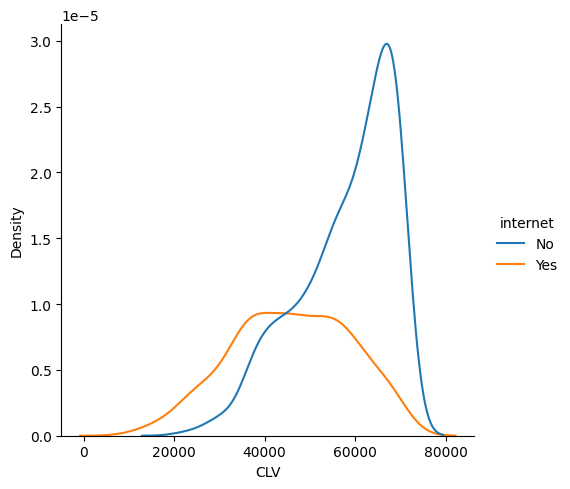

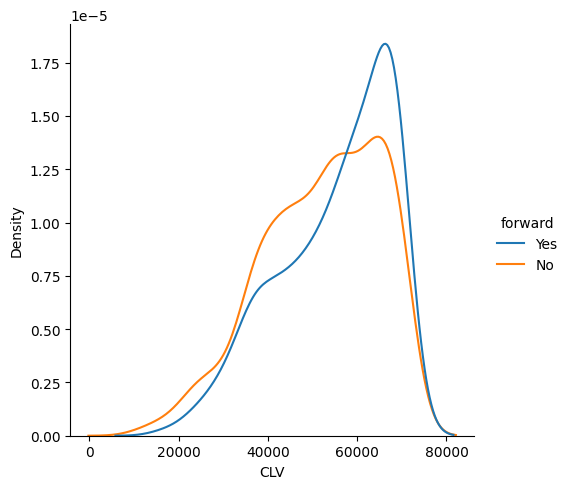

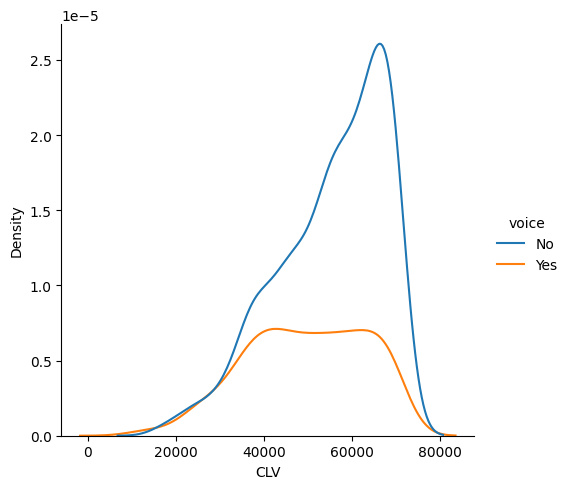

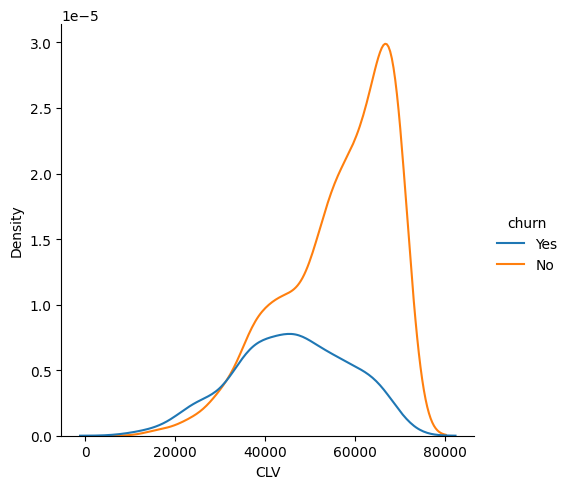

In [57]:
sns.displot(data, kind='kde', x='CLV', hue='gender')
sns.displot(data, kind='kde', x='CLV', hue='ed')
sns.displot(data, kind='kde', x='CLV', hue='retire')
sns.displot(data, kind='kde', x='CLV', hue='custcat')
sns.displot(data, kind='kde', x='CLV', hue='region')
sns.displot(data, kind='kde', x='CLV', hue='marital')
sns.displot(data, kind='kde', x='CLV', hue='internet')
sns.displot(data, kind='kde', x='CLV', hue='forward')
sns.displot(data, kind='kde', x='CLV', hue='voice')
sns.displot(data, kind='kde', x='CLV', hue='churn')


REPORT

To analyze churn risk, coefficients from the survival models show how different factors come into play. For example, a Log-Normal model may reveal such variables as customer category (particularly E-service and Plus service), internet subscription, marital status (unmarried) and having voice service exhibiting notable coefficients. What these figures indicate is the magnitude as well as direction of relationship between each predictor variable with respect to churn risk.

You can identify valuable segments by looking at those that have high probability of churning while also having high CLV. It is possible that customers falling under E-Service or plus services categories who are not married but have internet subscriptions may be considered valuable segment due to their higher CLVs although they also present with increased risks for churn. Valuable segments should ideally be defined as areas having both large revenue potentials (CLV) and lower chances of losing clients through defection.

One can estimate the annual retention budget by calculating total CLV over one year among subscribers at risk considering survival probabilities. This entails multiplying individual subscriber’s CLVs by his/her probability surviving then summing up all these values across different people. The amount set aside in this budget would be spent on keeping customers from leaving early which leads to higher profits.

Personalization is a good strategy for customer retention. This means that besides traditional methods such as targeted marketing or improving services offered to clients in general; individualized approaches should be adopted based on their behavior towards the business. Some of these techniques may include reaching out proactively to customers who show signs they are about to leave, giving them customized incentives and communicating through various channels which resonate with each one personally so as to enhance overall experience and satisfaction. Equally important is keeping track of churn rates over time by continuously monitoring and analyzing patterns then modifying plans where necessary hence ensuring that most people stay with the establishment for extended periods.